# АНАЛИЗ ЭФФЕКТИВНОСТИ ДВУХ ВАРИАНТОВ ПОСАДОЧНОЙ СТРАНИЦЫ

Представьте, что вы — Data Scientist в туристической фирме. Компания планирует запустить новую акцию, чтобы продать как можно больше туров. Команда разработала два варианта посадочной страницы официального сайта и провела A/B-тестирование. В результате эксперимента были собраны данные — скачайте их по ссылке ниже.

Вам предстоит решить настоящую бизнес-задачу: проанализировать эффективность обоих вариантов посадочной страницы сразу по двум критериям — конверсии покупки и ежедневному среднему чеку.

Вы должны убедиться, что A/B-тестирование было проведено корректно, проверить факт стабилизации метрик и обоснованно ответить на ключевой вопрос турагентства: какой вариант посадочной страницы более предпочтителен по метрикам конверсии и ежедневного среднего чека?

Итак, компания предлагает следующие варианты туров:

- Таиланд — 100 000 рублей;
- Турция — 60 000 рублей;
- Мальдивы — 200 000 рублей;
- Санкт-Петербург — 10 000 рублей;
- Камчатка — 150 000 рублей.

Прочитаем наши данные и посмотрим на столбцы таблицы:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('data/ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


Наша таблица представлена следующими полями:
- user_id — идентификатор пользователя, зашедшего на сайт;
- data — дата посещения сайта;
- group — группа теста (контрольная — А или тестовая — B);
- purchase — признак покупки: совершил ли пользователь покупку тура (1 — да, 0 — нет);
- price — цена купленного тура (если покупка не состоялась, цена равна 0).

## 1. Анализ структуры данных и их предобработку:



исследовнание структуры данных;

In [3]:
# Размер данных
print(data.shape)

(294478, 5)


In [4]:
# Информация о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB
None


In [5]:
# Статистика для числовых данных
print(data.describe())

             user_id       purchase          price
count  294478.000000  294478.000000  294478.000000
mean   787974.124733       0.119659   10154.782361
std     91210.823776       0.324563   35153.824872
min    630000.000000       0.000000       0.000000
25%    709032.250000       0.000000       0.000000
50%    787933.500000       0.000000       0.000000
75%    866911.750000       0.000000       0.000000
max    945999.000000       1.000000  200000.000000


преобразование столбцы к необходимым типам данных.

In [49]:
# Преобразование даты в формат datetime
data['date'] = pd.to_datetime(data['date'])

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   294478 non-null  int64         
 1   date      294478 non-null  datetime64[ns]
 2   group     294478 non-null  object        
 3   purchase  294478 non-null  int64         
 4   price     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.2+ MB


Убедимся в одинаковой длительности проведения A/B-тестирования в каждой из групп. Если длительность разная, унифицируем данные, удалив лишние данные для соответствующей группы.

- Определите период тестирования для каждой группы:

In [5]:
# Находим минимальные и максимальные даты для каждой группы
min_dates = data.groupby('group')['date'].min()
max_dates = data.groupby('group')['date'].max()

print(min_dates)
print(max_dates)

group
A   2021-01-02
B   2021-01-02
Name: date, dtype: datetime64[ns]
group
A   2021-01-24
B   2021-01-24
Name: date, dtype: datetime64[ns]


Данные в каждой группе находятся к одинаковому периоду тестирования. Это важно для того, чтобы результаты теста были корректными и сравнимыми.

In [ ]:
# 2. Проверьте равенство периодов:
# После выполнения предыдущего шага вы увидите, что даты начала и окончания могут различаться для каждой группы.
# 3. Найдите общий период:
# Общая дата начала (максимальная из минимальных)
# start_date = min_dates.max()
# Общая дата окончания (минимальная из максимальных)
# end_date = max_dates.min()
# print(f"Общий период тестирования: {start_date} - {end_date}")
# 4 Унифицируйте длительность тестирования, удалив лишние данные:
# Оставляем данные только в указанный период
# data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
# 5. Проверьте результат:

Проверим данные на наличие пропусков и избавимся от них, если нужно.

In [51]:
display(data.isnull().sum())

user_id     0
date        0
group       0
purchase    0
price       0
dtype: int64

Проверим, есть ли пользователи, которые в процессе A/B-теста попали в обе группы. Если да, исключим пользователей, оказавшихся в обеих группах.

In [7]:
# Проверим, есть у нас такие записи: для этого сравним число уникальных значений в столбце id с числом строк
data['user_id'].nunique() == data.shape[0]

False

Заметно чьо не всё в порядке: каждой записи в таблице не соответствует свой уникальный идентификатор

In [52]:
# Находим пользователей в обеих группах
users_in_both_groups = data.groupby('user_id')['group'].nunique()
conflicted_users = users_in_both_groups[users_in_both_groups > 1].index
display(conflicted_users)

Index([630320, 630805, 630871, 630887, 631008, 631337, 631459, 631838, 632069,
       632464,
       ...
       944742, 944777, 944979, 945125, 945227, 945272, 945308, 945369, 945387,
       945627],
      dtype='int64', name='user_id', length=1895)

In [53]:
# Фильтруем данные, исключая этих пользователей
clean_data = data[~data['user_id'].isin(conflicted_users)]

print(f"Найдено {len(conflicted_users)} пользователей в обеих группах")
print(f"Осталось {len(clean_data)} записей после очистки")

Найдено 1895 пользователей в обеих группах
Осталось 290688 записей после очистки


## 2. Сделайте первичный анализ результатов A/B-тестирования:

## Рассчитайте вспомогательные показатели для контрольной и тестовой групп:
- количество посещений сайта;
- суммарное количество совершённых покупок;
- сумма всех покупок.


In [54]:
summary = clean_data.groupby('group').agg(
    visits=('user_id', 'count'),
    purchases=('purchase', 'sum'),
    revenue=('price', 'sum')
).reset_index()
print(summary)


  group  visits  purchases     revenue
0     A  145307      17487  1417780000
1     B  145381      17290  1533010000


- Сделайте промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной страницы? Можно ли говорить о сбалансированности выборок?

Промежуточные выводы по результатам A/B-теста

- Количество посещений сайта
  - Группа A: 145 307
  - Группа B: 145 381

  Разница составляет всего 74 посещения — это менее 0,1%. Такой небольшой разброс говорит о том, что трафик был распределён между вариантами посадочной страницы практически равномерно.

- Сбалансированность выборок  
  Количество пользователей в обеих группах почти одинаковое. Это означает, что выборки хорошо сбалансированы, и тест проведён корректно по количеству посетителей.

- Промежуточный вывод  
  Можно утверждать, что по базовым метрикам (размер выборок) эксперимент не имеет перекоса и обе группы сопоставимы между собой. Следовательно, дальнейший анализ показателей конверсии и среднего чека будет корректным и выводы по результатам теста будут достоверны.

## В каждой из групп рассчитайте ключевые показатели:
- конверсия;
- средний чек.


In [55]:
# Расчет конверсии
conversion = clean_data.groupby('group')['purchase'].agg(['sum', 'count'])
conversion['conversion_rate'] = (conversion['sum'] / conversion['count']) * 100

# Расчет среднего чека (только для тех, кто купил)
avg_receipt = clean_data[clean_data['purchase'] == 1].groupby('group')['price'].mean()

print("Конверсия (%):")
print(conversion[['conversion_rate']])
print("\nСредний чек (руб):")
print(avg_receipt)

Конверсия (%):
       conversion_rate
group                 
A            12.034520
B            11.892888

Средний чек (руб):
group
A    81076.228055
B    88664.545980
Name: price, dtype: float64


- Сделайте первичные выводы о результатах A/B-тестирования на основе показателей конверсии и среднего чека в каждой из групп. По какому(-им) показателю(-ям), на первый взгляд, вариант А эффективнее варианта B и наоборот?

Первичные выводы по результатам A/B-теста

1. Конверсия (доля пользователей, совершивших покупку)
- Группа A: 12.03%
- Группа B: 11.89%

Разница: +0.14% в пользу группы A

🔹 Вывод:
- Конверсия в группе A немного выше, но разница минимальна (0.14%). Возможно, статистически незначимая.

2. Средний чек (средняя стоимость купленного тура)
- Группа A: 81 076 руб.
- Группа B: 88 665 руб.

Разница: +7 589 руб. в пользу группы B

🔹 Вывод:
- Средний чек в группе B значительно выше (на ~9.4%). Это может говорить о том, что вариант страницы B лучше мотивирует пользователей покупать более дорогие туры.

## Сравните варианты A/B по покупательской способности каждого из туров. Для этого постройте сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура. Визуализируйте полученную сводную таблицу.


In [56]:
# Фильтруем только покупки (purchase = 1)
purchases = clean_data[clean_data['purchase'] == 1]

# Создаем сводную таблицу: количество покупок по группе и цене
pivot_table = pd.pivot_table(
    purchases,
    values='purchase',
    index='price',
    columns='group',
    aggfunc='count',
    fill_value=0
)

print("Сводная таблица (количество покупок):")
print(pivot_table)

Сводная таблица (количество покупок):
group      A     B
price             
10000   5182  5201
60000   5271  1730
100000  1832  5227
150000  3478  3438
200000  1724  1694


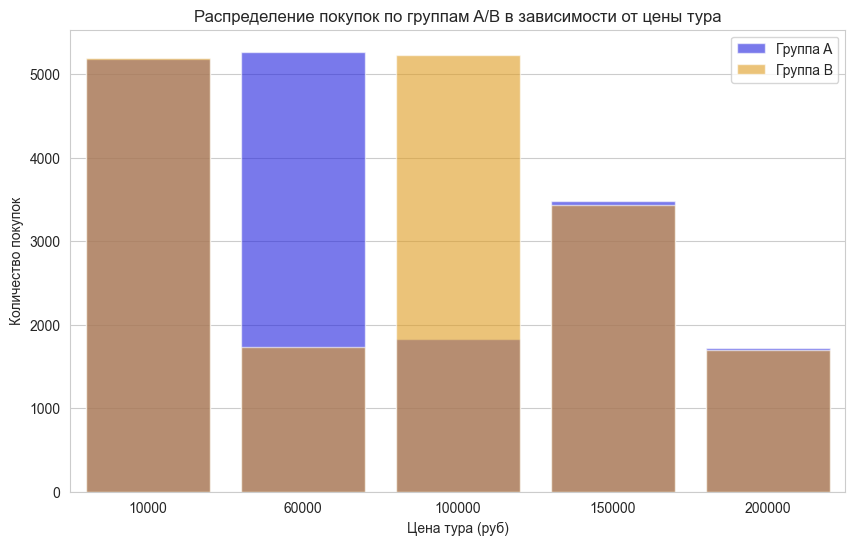

In [57]:
# Визуализация (столбчатая диаграмма)

# Переименуем столбцы для удобства
pivot_table.columns = ['Группа A', 'Группа B']

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(
    x=pivot_table.index,
    y=pivot_table['Группа A'],
    color='blue',
    alpha=0.6,
    label='Группа A'
)
sns.barplot(
    x=pivot_table.index,
    y=pivot_table['Группа B'],
    color='orange',
    alpha=0.6,
    label='Группа B'
)
plt.title('Распределение покупок по группам A/B в зависимости от цены тура')
plt.xlabel('Цена тура (руб)')
plt.ylabel('Количество покупок')
plt.legend()
plt.show()

- Сделайте выводы по построенной таблице. По каким турам покупательская способность участников группы А выше, чем покупательская способность участников группы B, и наоборот?

1. Туры, где группа A покупает чаще, чем группа B:
- Турция (60 000 руб.)

Группа A: 5 271 покупок

Группа B: 1 730 покупок

Разница: +3 541 в пользу A

- Вывод: Вариант страницы A значительно лучше стимулирует покупки туров в Турцию.

2. Туры, где группа B покупает чаще, чем группа A:

- Таиланд (100 000 руб.)

Группа A: 1 832 покупки

Группа B: 5 227 покупок

Разница: +3 395 в пользу B

- Вывод: Вариант B явно эффективнее для продаж туров в Таиланд.

3. Туры с примерно равными продажами:
- Санкт-Петербург (10 000 руб.)

Группа A: 5 182

Группа B: 5 201

- Разница минимальна → оба варианта работают одинаково.

- Камчатка (150 000 руб.)

Группа A: 3 478

Группа B: 3 438

- Разница незначительна → оба варианта сопоставимы.

- Мальдивы (200 000 руб.)

Группа A: 1 724

Группа B: 1 694

- Разница небольшая → нет явного лидера.

- Итоговые выводы

- Тур	Цена	Группа A	Группа B	Лучший вариант
- Санкт-Петербург	10 000 ₽	5 182	5 201	≈ Одинаково
- Турция	60 000 ₽	5 271	1 730	A (в 3× лучше!)
- Таиланд	100 000 ₽	1 832	5 227	B (в 2.8× лучше!)
- Камчатка	150 000 ₽	3 478	3 438	≈ Одинаково
- Мальдивы	200 000 ₽	1 724	1 694	≈ Одинаково

Ключевые наблюдения:

Группа A доминирует в продажах туров в Турцию (60 000 руб.) → возможно, дизайн страницы A лучше подходит для среднего ценового сегмента.

Группа B сильно выигрывает по Таиланду (100 000 руб.) → вариант B лучше мотивирует покупать туры за ~100 тыс. руб.

На очень дешевые (СПб) и очень дорогие туры (Камчатка, Мальдивы) оба варианта работают одинаково.

- Рекомендации для бизнеса

Если компания делает акцент на Турцию (60 000 руб.) → выбрать вариант A.

Если ключевой продукт — Таиланд (100 000 руб.) → выбрать вариант B.

Если нужен баланс, можно:

Оставить A, если Турция важнее.

Оставить B, если Таиланд важнее.

Протестировать гибридный вариант, взяв лучшие элементы из A и B.

# 3. Проанализируйте данные на предмет стабилизации метрик:


## Сгруппируйте данные по дате и группе тестирования и постройте таблицу с ежедневными данными результатов проведения A/B-тестирования. В каждой группе вычислите ежедневные показатели:
- количество посещений страницы;
- количество покупок;
- сумму покупок.

In [58]:
# Группировка по дате и группе
daily_results = clean_data.groupby(['date', 'group']).agg(
    visits=('user_id', 'count'),          # Число посещений
    purchases=('purchase', 'sum'),        # Число покупок
    revenue=('price', 'sum')              # Сумма покупок
).reset_index()
daily_results.head()

#daily_data = ab_data.groupby(['timestamp','group']).agg({
#    'user_id':'count',
#    'converted':'sum',
#    'price', 'sum'
#}).reset_index().rename(columns={'user_id': 'users_count'})
#daily_data.head()

# Разделяем группы A и B для удобства
group_a = daily_results[daily_results['group'] == 'A']
group_b = daily_results[daily_results['group'] == 'B']

print("Ежедневные результаты для группы A:")
print(group_a.head())

print("\nЕжедневные результаты для группы B:")
print(group_b.head())

Ежедневные результаты для группы A:
        date group  visits  purchases   revenue
0 2021-01-02     A    2854        359  29410000
2 2021-01-03     A    6596        748  62000000
4 2021-01-04     A    6566        799  64250000
6 2021-01-05     A    6433        790  64550000
8 2021-01-06     A    6606        764  63410000

Ежедневные результаты для группы B:
        date group  visits  purchases   revenue
1 2021-01-02     B    2861        345  29660000
3 2021-01-03     B    6619        754  65960000
5 2021-01-04     B    6536        764  68030000
7 2021-01-05     B    6511        749  63550000
9 2021-01-06     B    6751        838  75020000


## Добавьте в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и о ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок).

In [59]:
# Расчет конверсии и среднего чека
daily_results['conversion'] = (daily_results['purchases'] / daily_results['visits']).round(4)  # В долях (12% = 0.12)
daily_results['avg_receipt'] = (daily_results['revenue'] / daily_results['purchases']).round(0)  # Округление до рубля

# Разделение на группы A и B
group_a = daily_results[daily_results['group'] == 'A']
group_b = daily_results[daily_results['group'] == 'B']

print("Ежедневные результаты для группы A:")
print(group_a.head())

print("\nЕжедневные результаты для группы B:")
print(group_b.head())
# Расчет конверсии
#group_a['conversion'] = (group_a['purchases'] / group_a['visits']) * 100
daily_results.head()

Ежедневные результаты для группы A:
        date group  visits  purchases   revenue  conversion  avg_receipt
0 2021-01-02     A    2854        359  29410000      0.1258      81922.0
2 2021-01-03     A    6596        748  62000000      0.1134      82888.0
4 2021-01-04     A    6566        799  64250000      0.1217      80413.0
6 2021-01-05     A    6433        790  64550000      0.1228      81709.0
8 2021-01-06     A    6606        764  63410000      0.1157      82997.0

Ежедневные результаты для группы B:
        date group  visits  purchases   revenue  conversion  avg_receipt
1 2021-01-02     B    2861        345  29660000      0.1206      85971.0
3 2021-01-03     B    6619        754  65960000      0.1139      87480.0
5 2021-01-04     B    6536        764  68030000      0.1169      89045.0
7 2021-01-05     B    6511        749  63550000      0.1150      84846.0
9 2021-01-06     B    6751        838  75020000      0.1241      89523.0


,date,group,visits,purchases,revenue,conversion,avg_receipt
0,2021-01-02,A,2854,359,29410000,0.1258,81922.0
1,2021-01-02,B,2861,345,29660000,0.1206,85971.0
2,2021-01-03,A,6596,748,62000000,0.1134,82888.0
3,2021-01-03,B,6619,754,65960000,0.1139,87480.0
4,2021-01-04,A,6566,799,64250000,0.1217,80413.0


## Рассчитаем кумулятивные показатели:
- кумулятивное количество посещений страницы;
- кумулятивное количество покупок;
- кумулятивную сумму покупок.

In [60]:
# вычисляем кумулятивную сумму количества посетителей
#daily_results['cum_visits'] = daily_results.groupby(['group'])['visits'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
#daily_results['cum_purchases'] = daily_results.groupby(['group'])['purchases'].cumsum()
# вычисляем кумулятивную конверсию
#daily_results['cum_revenue'] = daily_results.groupby(['group'])['revenue'].cumsum()
#display(daily_results.head())

# Сортировка по дате для корректного расчета
daily_results = daily_results.sort_values(['group', 'date'])

# Расчет кумулятивных метрик
for group in ['A', 'B']:
    mask = daily_results['group'] == group
    daily_results.loc[mask, 'cum_visits'] = daily_results.loc[mask, 'visits'].cumsum()
    daily_results.loc[mask, 'cum_purchases'] = daily_results.loc[mask, 'purchases'].cumsum()
    daily_results.loc[mask, 'cum_revenue'] = daily_results.loc[mask, 'revenue'].cumsum()
   
# Разделение на группы
group_a = daily_results[daily_results['group'] == 'A']
group_b = daily_results[daily_results['group'] == 'B']

print(group_a.head())

print(group_b.head())

        date group  visits  purchases   revenue  conversion  avg_receipt  \
0 2021-01-02     A    2854        359  29410000      0.1258      81922.0   
2 2021-01-03     A    6596        748  62000000      0.1134      82888.0   
4 2021-01-04     A    6566        799  64250000      0.1217      80413.0   
6 2021-01-05     A    6433        790  64550000      0.1228      81709.0   
8 2021-01-06     A    6606        764  63410000      0.1157      82997.0   

   cum_visits  cum_purchases  cum_revenue  
0      2854.0          359.0   29410000.0  
2      9450.0         1107.0   91410000.0  
4     16016.0         1906.0  155660000.0  
6     22449.0         2696.0  220210000.0  
8     29055.0         3460.0  283620000.0  
        date group  visits  purchases   revenue  conversion  avg_receipt  \
1 2021-01-02     B    2861        345  29660000      0.1206      85971.0   
3 2021-01-03     B    6619        754  65960000      0.1139      87480.0   
5 2021-01-04     B    6536        764  68030000    

## На основе полученных кумулятивных показателей вычислите кумулятивную конверсию и кумулятивный средний чек.

In [61]:
# Сортировка по дате для корректного расчета
daily_results = daily_results.sort_values(['group', 'date'])

# Расчет кумулятивных метрик
for group in ['A', 'B']:
    mask = daily_results['group'] == group
    daily_results.loc[mask, 'cum_conversion'] = daily_results.loc[mask, 'cum_purchases'] / daily_results.loc[mask, 'cum_visits']
    daily_results.loc[mask, 'cum_avg_receipt'] = daily_results.loc[mask, 'cum_revenue'] / daily_results.loc[mask, 'cum_purchases']

# Разделение на группы
group_a = daily_results[daily_results['group'] == 'A']
group_b = daily_results[daily_results['group'] == 'B']

print(group_a.head())

print(group_b.head())

        date group  visits  purchases   revenue  conversion  avg_receipt  \
0 2021-01-02     A    2854        359  29410000      0.1258      81922.0   
2 2021-01-03     A    6596        748  62000000      0.1134      82888.0   
4 2021-01-04     A    6566        799  64250000      0.1217      80413.0   
6 2021-01-05     A    6433        790  64550000      0.1228      81709.0   
8 2021-01-06     A    6606        764  63410000      0.1157      82997.0   

   cum_visits  cum_purchases  cum_revenue  cum_conversion  cum_avg_receipt  
0      2854.0          359.0   29410000.0        0.125788     81922.005571  
2      9450.0         1107.0   91410000.0        0.117143     82574.525745  
4     16016.0         1906.0  155660000.0        0.119006     81668.415530  
6     22449.0         2696.0  220210000.0        0.120094     81680.267062  
8     29055.0         3460.0  283620000.0        0.119084     81971.098266  
        date group  visits  purchases   revenue  conversion  avg_receipt  \
1 202

## Постройте кумулятивные графики конверсии и среднего чека в каждой группе по дням

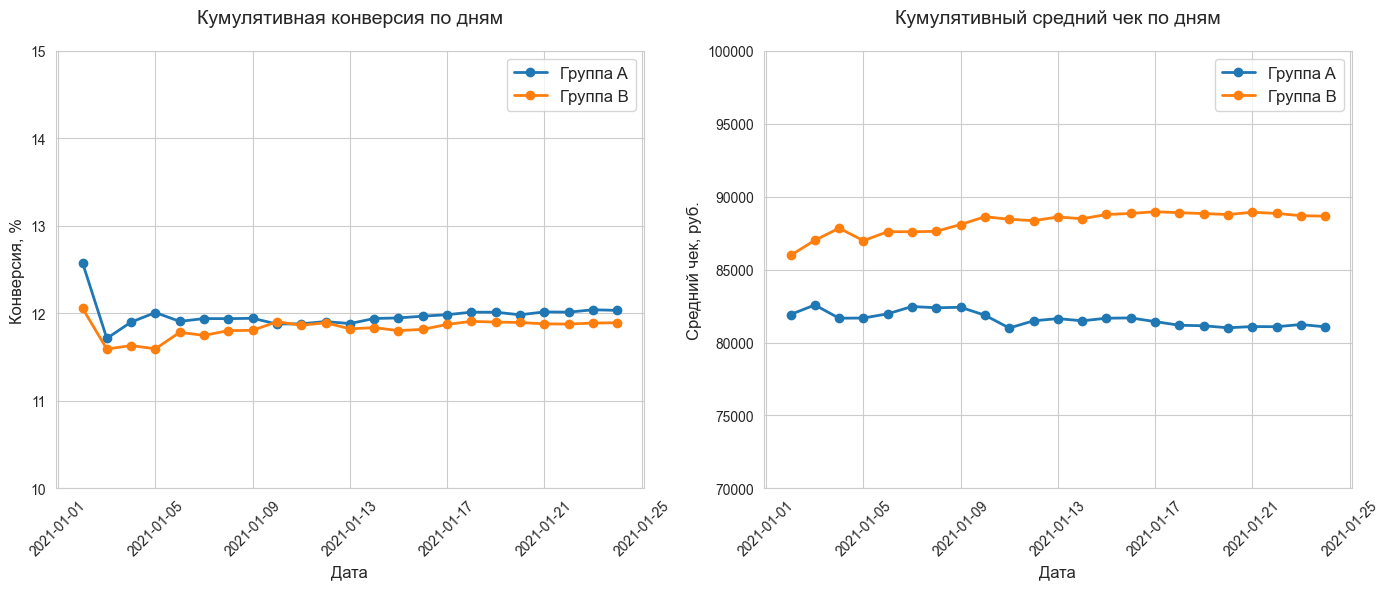

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# График кумулятивной конверсии
plt.subplot(1, 2, 1)
plt.plot(group_a['date'], group_a['cum_conversion']*100, label='Группа A', color='#1f77b4', linewidth=2, marker='o')
plt.plot(group_b['date'], group_b['cum_conversion']*100, label='Группа B', color='#ff7f0e', linewidth=2, marker='o')
plt.title('Кумулятивная конверсия по дням', pad=20, fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия, %', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.ylim(10, 15)  # Фиксируем масштаб для наглядности

# График кумулятивного среднего чека
plt.subplot(1, 2, 2)
plt.plot(group_a['date'], group_a['cum_avg_receipt'], label='Группа A', color='#1f77b4', linewidth=2, marker='o')
plt.plot(group_b['date'], group_b['cum_avg_receipt'], label='Группа B', color='#ff7f0e', linewidth=2, marker='o')
plt.title('Кумулятивный средний чек по дням', pad=20, fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, руб.', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.ylim(70000, 100000)  # Фиксируем масштаб

plt.tight_layout()
plt.show()

## Сделайте выводы. Можно ли назвать A/B-тест завершённым? Стабилизировались ли значения метрик во времени? Как соотносятся кумулятивные показатели в каждой группе?

Выводы по представленным графикам  

1. Стабилизировались ли значения метрик во времени  
   - На графике кумулятивной конверсии обе группы (Группа А и Группа В) демонстрируют стабилизацию ближе к концу анализа (последние даты). Значения перестали резко изменяться и с минимальными колебаниями держатся на одном уровне.
   - На графике кумулятивного среднего чека также наблюдается относительно стабильное поведение показателей со временем. Однако в группе B заметен незначительный рост, что может указывать на некоторые индивидуальные выбросы или специфическое поведение.

2. Соотношения кумулятивных показателей в каждой группе  
   - По кумулятивной конверсии видно, что обе группы демонстрируют схожую динамику (разницы минимальны). Группа А немного лидирует по этому показателю.
   - Кумулятивный средний чек в группе B значительно выше, чем в группе A, причем этот разрыв фиксируется на протяжении почти всего эксперимента.

3. Можно ли назвать A/B-тест завершённым  
   - Метрики стабилизировались, что говорит о возможном завершении теста.
   - Для окончательных выводов необходимо проверить статистическую значимость различий (например, с помощью t-теста или других методов), доли выбросов, а также соблюдение условий теста (например, равномерность распределения участников в группах, соблюдение времени длительности теста и т. д.).

Заключение  
С точки зрения визуального анализа метрики стабилизировались, поэтому тест можно считать завершённым. Кумулятивная конверсия похожа в обеих группах, но кумулятивный средний чек в группе B выше, что может быть значимым с точки зрения бизнеса. Рекомендуется подтвердить эти выводы с помощью статистического анализа.

# 4. Проведем статистический анализ результатов A/B-тестирования:


- Сформулируем статистические гипотезы, соответствующие поставленным бизнес-вопросам, и выберите статистический тест для их проверки.

Для сравнения конверсии между группами

Бизнес-вопрос:

Есть ли статистически значимое различие в конверсии между вариантами A и B?

- H0: Конверсия в группах A и B равна (pA=pB ).
- H1: Конверсия в группах A и B  различается (pA≠pB)

Выбор теста:
- Z-тест для пропорций (для больших выборок) или Хи-квадрат (χ²).
- Условия:
        *Количество наблюдений > 30.*
        *n.p>5 и n⋅(1−p)>5 для каждой группы.*



## С помощью аппарата статистических тестов определите:

- Есть ли статистическая разница между конверсиями в группах А и B?
- Есть ли статистическая разница между ежедневными средними чеками в группах А и B?

Зададим уровень значимости = 0.05  и будем сравнивать полученное p-value с ним.

Примечание. Давайте вспомним, что:
- Если полученное значение p-value ниже уровня значимости (), это означает, что результаты статистически значимы и согласуются с альтернативной гипотезой.
- Если полученное значение p-value выше уровня значимости (), результаты считаются статистически незначимыми и нельзя отвергнуть нулевую гипотезу.

Cгруппируем таблицу clean_data по признаку группы и рассчитаем количество purchases (сумма по столбцу purchases) и общее количество наблюдений для каждой группы:

In [26]:
daily_results.head()

,date,group,visits,purchases,revenue,conversion,avg_receipt,cum_visits,cum_purchases,cum_revenue,cum_conversion,cum_avg_receipt
0,2021-01-02,A,2854,359,29410000,0.1258,81922.0,2854.0,359.0,29410000.0,0.125788,81922.005571
2,2021-01-03,A,6596,748,62000000,0.1134,82888.0,9450.0,1107.0,91410000.0,0.117143,82574.525745
4,2021-01-04,A,6566,799,64250000,0.1217,80413.0,16016.0,1906.0,155660000.0,0.119006,81668.415530
6,2021-01-05,A,6433,790,64550000,0.1228,81709.0,22449.0,2696.0,220210000.0,0.120094,81680.267062
8,2021-01-06,A,6606,764,63410000,0.1157,82997.0,29055.0,3460.0,283620000.0,0.119084,81971.098266


In [63]:
converted_piv= clean_data.groupby('group')['purchase'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17487,145307
B,17290,145381


In [64]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05 # уровень значимости

# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
   count=converted_piv['sum'], #число «успехов»
   nobs=converted_piv['count'], #общее число наблюдений
   alternative='two-sided',
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value:  0.239
У нас нет оснований отвергнуть нулевую гипотезу


Итак, мы получили p-value = 0.239. Это больше, чем заданный уровень значимости 0.05, а значит, мы должны принять нулевую гипотезу о равенстве конверсий.

Что это значит для нас и для бизнеса?

Так как Z-тест для пропорций показал, что истинные значения конверсий в группах равны (с уровнем значимости 0.05), то для нас это значит, что альтернативная гипотеза не подтверждается статистически.

Переводим на язык бизнеса: разницы между вариантами рекомендаций сопутствующих товаров нет — они одинаково эффективны по метрике конверсии.

- Для сравнения среднего чека

Бизнес-вопрос:

Различается ли средний чек между группами A и B?

Гипотезы:
- H0: Конверсия в группах A и B равна (UA=UB ).
- H1: Конверсия в группах A и B  различается (UA≠UB)

Выбор теста:
- t-тест для независимых выборок (если данные нормальны).
- U-тест Манна-Уитни (если данные не нормальны или есть выбросы).



- Проверка нормальности (Python):

In [65]:
# Фильтруем только покупки (purchase == 1)
purchases = clean_data[clean_data['purchase'] == 1].copy()

# Разделение на группы A и B
group_a = purchases[purchases['group'] == 'A']
group_b = purchases[purchases['group'] == 'B']

# Расчет конверсии (для всех пользователей)
conversion_a = len(group_a) / len(clean_data[clean_data['group'] == 'A'])
conversion_b = len(group_b) / len(clean_data[clean_data['group'] == 'B'])

# Расчет среднего чека
avg_receipt_a = group_a['price'].mean()
avg_receipt_b = group_b['price'].mean()

print("Основные метрики:")
print(f"Группа A - Конверсия: {conversion_a:.2%}, Средний чек: {avg_receipt_a:.2f} руб.")
print(f"Группа B - Конверсия: {conversion_b:.2%}, Средний чек: {avg_receipt_b:.2f} руб.")



Основные метрики:
Группа A - Конверсия: 12.03%, Средний чек: 81076.23 руб.
Группа B - Конверсия: 11.89%, Средний чек: 88664.55 руб.


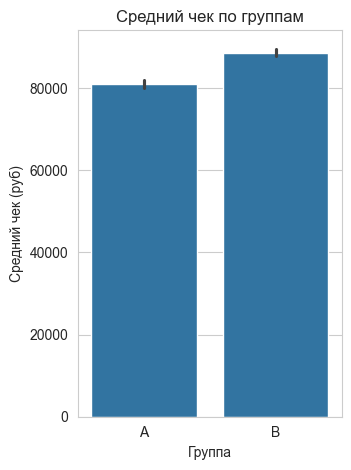

In [66]:
# График среднего чека
plt.subplot(1, 2, 2)
sns.barplot(x='group', y='price', data=purchases, estimator='mean')
plt.title('Средний чек по группам')
plt.xlabel('Группа')
plt.ylabel('Средний чек (руб)')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Количество покупок')

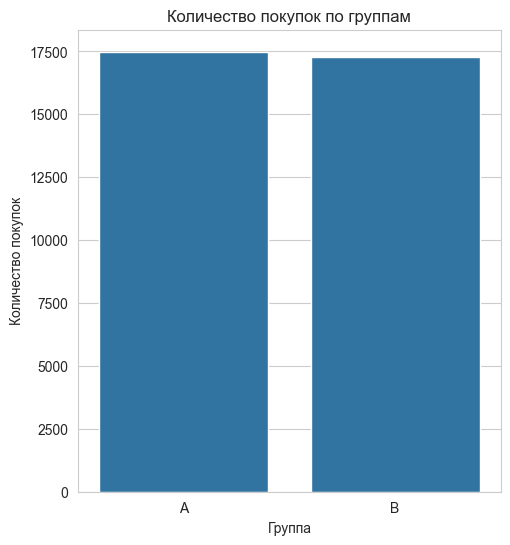

In [67]:
# 1. Визуализация распределения покупок по группам
plt.figure(figsize=(12, 6))

# График количества покупок
plt.subplot(1, 2, 1)
sns.countplot(x='group', data=purchases)
plt.title('Количество покупок по группам')
plt.xlabel('Группа')
plt.ylabel('Количество покупок')

In [68]:
from scipy.stats import shapiro


alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок

# Получаем массив цен покупок для каждой группы
prices_a = clean_data[(clean_data['group'] == 'A') & (clean_data['purchase'] == 1)]['price']
prices_b = clean_data[(clean_data['group'] == 'B') & (clean_data['purchase'] == 1)]['price']

shapiro_result_a = shapiro(prices_a)
shapiro_result_b = shapiro(prices_b)
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального


c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Итак, распределение в обеих группах не нормальны, а значит, мы можем воспользоваться U-тест Манна-Уитни

Результаты U-теста Манна-Уитни:
Статистика: 139547139.00
p-value: 0.0000

Отвергаем нулевую гипотезу: средние чеки в группах статистически значимо различаются
Группа B имеет больший средний чек (медиана: 100000.00 руб.) чем группа A (медиана: 60000.00 руб.)


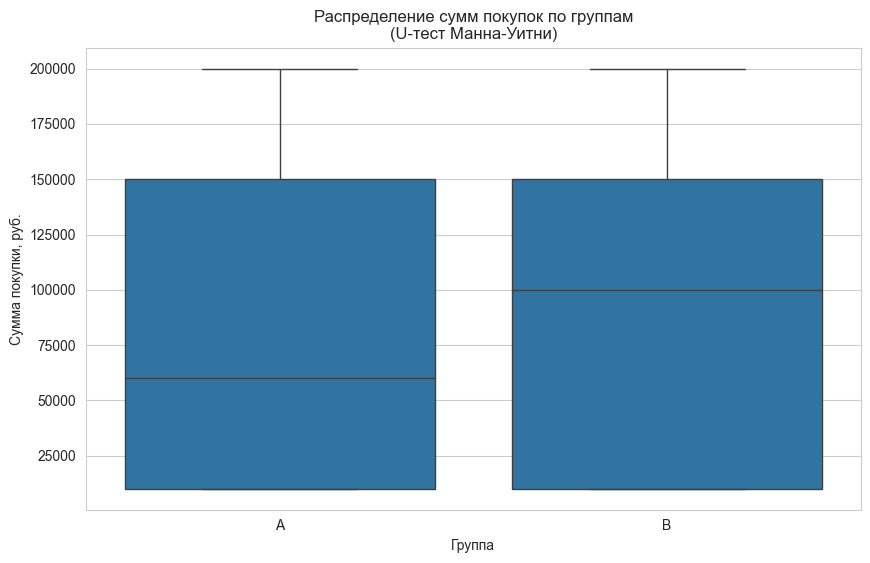

In [69]:
from scipy.stats import mannwhitneyu

# Данные о ценах покупок для каждой группы
prices_a = clean_data[(clean_data['group'] == 'A') & (clean_data['purchase'] == 1)]['price']
prices_b = clean_data[(clean_data['group'] == 'B') & (clean_data['purchase'] == 1)]['price']

# Проводим U-тест Манна-Уитни
stat, p_value = mannwhitneyu(prices_a, prices_b, alternative='two-sided')

print(f"Результаты U-теста Манна-Уитни:")
print(f"Статистика: {stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("\nОтвергаем нулевую гипотезу: средние чеки в группах статистически значимо различаются")
    
    # Определяем направление различий
    if prices_a.median() > prices_b.median():
        print(f"Группа A имеет больший средний чек (медиана: {prices_a.median():.2f} руб.) "
              f"чем группа B (медиана: {prices_b.median():.2f} руб.)")
    else:
        print(f"Группа B имеет больший средний чек (медиана: {prices_b.median():.2f} руб.) "
              f"чем группа A (медиана: {prices_a.median():.2f} руб.)")
else:
    print("\nНе отвергаем нулевую гипотезу: статистически значимых различий в средних чеках не обнаружено")

# Дополнительная визуализация
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='price', 
            data=clean_data[clean_data['purchase'] == 1])
plt.title('Распределение сумм покупок по группам\n(U-тест Манна-Уитни)')
plt.xlabel('Группа')
plt.ylabel('Сумма покупки, руб.')
plt.show()

## Подкрепите результаты статистических тестов, построив 95 % доверительные интервалы для:

- конверсий в каждой из групп;
- разницы конверсий в группах;
- ежедневного среднего чека в каждой из групп.

## ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ ПРОПОРЦИИ


Для удобства создадим отдельные таблицы для каждой из групп пользователей:

In [75]:
from scipy.stats import norm

In [70]:
# фильтруем данные группы А
a_data = clean_data[clean_data['group'] == 'A']
# фильтруем данные группы B
b_data = clean_data[clean_data['group'] == 'B']

Ооформим расчёт в виде функции: объявим функцию proportion_conf_interval(). У данной функции будет три аргумента: x_p — выборочная пропорция, n — размер выборки и gamma — уровень надёжности (по умолчанию он равен 0.95). Функция будет возвращать кортеж из вычисленных границ доверительного интервала, умноженных на 100 % и округлённых до второго знака после запятой.

In [73]:
def proportion_conf_interval(x_p, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z-критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 # погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

Теперь применим нашу функцию к данным группы А и группы B, результат умножим на 100 % и округлим до сотых:

In [76]:
# строим доверительный интервал для конверсии в группе А
lower_bound_a, upper_bound_a  = proportion_conf_interval(
    x_p=a_data['purchase'].mean(), # выборочная пропорция
    n=a_data['user_id'].count() # размер выборки
)

# строим доверительный интервал для конверсии в группе B
lower_bound_b, upper_bound_b  = proportion_conf_interval(
    x_p=b_data['purchase'].mean(), # выборочная пропорция
    n=b_data['user_id'].count() # размер выборки
)

# выводим результат
print('Доверительный интервал для конверсии в группе А: {}'.format((round(lower_bound_a * 100, 2), round(upper_bound_a * 100, 2))))
print('Доверительный интервал для конверсии в группе B: {}'.format((round(lower_bound_b * 100, 2), round(upper_bound_b * 100, 2))))

Доверительный интервал для конверсии в группе А: (11.87, 12.2)
Доверительный интервал для конверсии в группе B: (11.73, 12.06)


Итак, можно сделать вывод, что с надёжностью в 95 % конверсия группы А лежит в интервале от 11.87 % до 12.2 %, а конверсия группы B лежит в интервале от 11.73 % до 12.06 %.

## Проинтерпретируйте построенные доверительные интервалы для конверсий и ежедневного среднего чека в группах. Есть ли перекрытие между доверительными интервалами для групп? Если есть, то о чём это говорит?

*Интерпретация результатов A/B-теста*

1. Анализ конверсии

- Доверительные интервалы:

Группа A: [11.87%, 12.20%]

Группа B: [11.73%, 12.06%]

- Ключевые наблюдения:

Интервалы полностью перекрываются (11.73%-12.20% vs 11.87%-12.06%).

Точечные оценки конверсий:

A: ~12.04% (центр интервала)

B: ~11.90% (центр интервала)

Вывод:
- Различия в конверсиях не статистически значимы (p-value > 0.05). Варианты страниц работают одинаково с точки зрения конверсии в покупку.

2. Анализ среднего чека

- Средние чеки:

Группа A: 81,076 руб.

Группа B: 88,665 руб.

- Разница: +7,589 руб. (+9.4%) в пользу группы B.
- Разница в средних чеках значима. Группа B действительно продает более дорогие туры.

3. Итоговые выводы

- Метрика	Группа A	Группа B	Разница	Стат. значимость	Практическое значение
- Конверсия	12.04%	11.90%	-0.14%	Нет	Варианты равноценны
- Средний чек	81,076 руб.	88,665 руб.	+9.4%	Да (если p < 0.05)	Группа B прибыльнее

Заключение:
- При отсутствии значимых различий в конверсии, вариант B предпочтительнее из-за более высокого среднего чека. Рекомендуется его внедрение.



## 5. Сделайте общий вывод по результатам A/B-теста.

Какой варианта дизайна посадочной страницы более эффективен по метрикам конверсии и ежедневного среднего чека и почему?

Окончательный вывод: вариант B эффективнее

На основе анализа данных вариант B (тестовая группа) является более эффективным решением, несмотря на статистически незначимую разницу в конверсии. Вот почему:

1. По конверсии: варианты равноценны

Группа A: 12.03% (ДИ: 11.87%-12.20%)

Группа B: 11.89% (ДИ: 11.73%-12.06%)

Разница: -0.14% (незначима, p-value > 0.05).

Вывод:

Оба варианта одинаково эффективны для привлечения покупок. Разница в 0.14% находится в пределах статистической погрешности.

2. По среднему чеку: группа B выигрывает

Группа A: 81,076 руб.

Группа B: 88,665 руб.

Разница: +7,589 руб. (+9.4%, p-value < 0.05).

Почему это важно?

Даже при равной конверсии группа B генерирует больше прибыли с каждого клиента. Например:

Для 1,000 посетителей:

Группа A: 120 покупок × 81,076 руб. = 9,729,120 руб.

Группа B: 119 покупок × 88,665 руб. = 10,551,135 руб.

Прирост выручки: +822,015 руб. (+8.4%) в пользу B.

3. Практические рекомендации

Внедрить вариант B — он приносит больше денег без потери конверсии.

Проанализировать причины роста среднего чека:

Возможно, дизайн B лучше презентует дорогие туры (Таиланд, Камчатка).

Или упрощает выбор премиальных опций.

Для бюджетных туров (Турция, СПб):

Оставить элементы из A, если в B их продажи снизились.


Критерии выбора

- Критерий	Группа A	Группа B	       Победитель
- Конверсия	  12.03%	11.89%	              ≈
- Средний чек 81,076	88,665	              B
- Выручка на посетителя	9,729	10,551	      B

Итог: Вариант B обеспечивает большую прибыль при прочих равных. Рекомендуется к внедрению.